In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [2]:
datapath1 = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/run1/"
datapath2 = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/run2/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv"]

model = models[-1]
df = pd.read_csv(datapath2 + model)


In [3]:
#get roi
rois = df.roi.unique()
#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



['US_WY', 'US_WV', 'US_VT', 'US_VI', 'US_VA', 'US_UT', 'US_TX', 'US_TN', 'US_SD', 'US_RI', 'US_OK', 'US_NY', 'US_NM', 'US_NJ', 'US_NH', 'US_ND', 'US_MT', 'US_MN', 'US_MI', 'US_ME', 'US_MD', 'US_KY', 'US_IA', 'US_HI', 'US_GU', 'US_DE', 'US_DC', 'US_AZ', 'US_AR', 'US_AK', 'US', 'Zimbabwe', 'Zambia', 'West Bank and Gaza', 'Venezuela', 'Uzbekistan', 'Uruguay', 'United Kingdom', 'United Arab Emirates', 'Ukraine', 'Turkey', 'Tunisia', 'Trinidad and Tobago', 'Togo', 'Thailand', 'Tanzania', 'Taiwan*', 'Syria', 'Switzerland', 'Sweden', 'Sudan', 'Sri Lanka', 'Spain', 'South Africa', 'Somalia', 'Slovenia', 'Slovakia', 'Singapore', 'Serbia', 'Senegal', 'Saudi Arabia', 'San Marino', 'Russia', 'Romania', 'Qatar', 'Portugal', 'Poland', 'Philippines', 'Peru', 'Paraguay', 'Panama', 'Pakistan', 'Oman', 'Norway', 'North Macedonia', 'Nigeria', 'Niger', 'New Zealand', 'Netherlands', 'Morocco', 'Montenegro', 'Monaco', 'Moldova', 'Mexico', 'Mauritius', 'Malta', 'Mali', 'Malaysia', 'Luxembourg', 'Lithuania', 

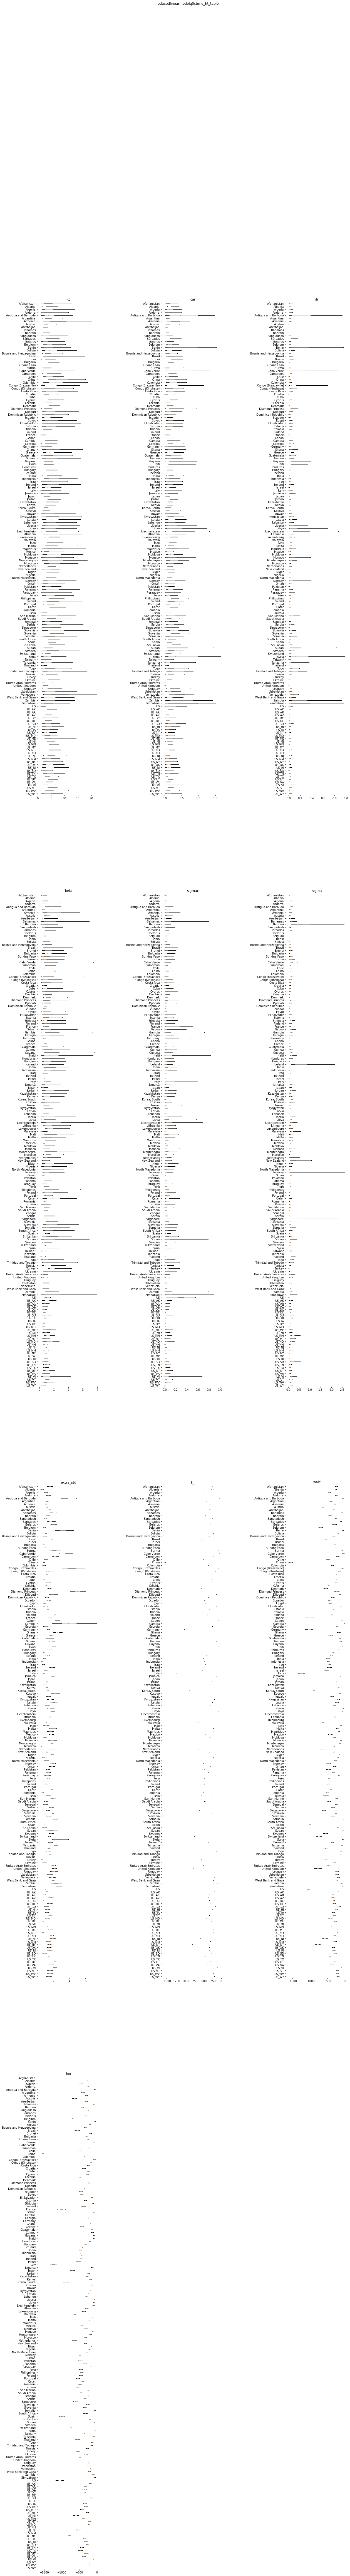

In [4]:
#plot side by side 

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
import math
def plot_table_data(df,rois):
    fig, axes = plt.subplots(math.ceil(ntheta/3), 3, figsize=(20, 150))
    for i, ax in enumerate(axes.flat):
        try:
            col = theta[i]
            for j, roi in enumerate(rois):
                boxes = [
                    {
                    'x': i,
                    'label' : roi,
                    'whislo': df.loc[(df.roi==roi)&(df['quantile']==0.025), col].values[0],    # Bottom whisker position
                    'q1'    : df.loc[(df.roi==roi)&(df['quantile']==0.25), col].values[0],    # First quartile (25th percentile)
                    'med'   : df.loc[(df.roi==roi)&(df['quantile']==0.5), col].values[0],    # Median         (50th percentile)
                    'q3'    : df.loc[(df.roi==roi)&(df['quantile']==0.75), col].values[0],     # Third quartile (75th percentile)
                    'whishi': df.loc[(df.roi==roi)&(df['quantile']==0.975), col].values[0],    # Top whisker position
                    'fliers': []        # Outliers
                    }
                ]
                ax.annotate(roi,-)
                ax.bxp(boxes, positions=[j], showfliers=False, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='none',edgecolor='gray'))
            ax.set_title(theta[i])
            simpleaxis(ax)
        except:
            simpleaxis(ax)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)
print(rois)

plot_table_data(df, rois)
plt.subplots_adjust(hspace=0.2,wspace=1)
plt.suptitle(model.split('.csv')[0])
plt.savefig("../postmodel_derivatives/"+model.split('.csv')[0]+'_allroi.png')
